In-Progress

In [34]:
from PIL import Image
import numpy as np
import imageio as iio
import matplotlib.pyplot as plt
import glob
import os


In [2]:
im = Image.open(r'C:\Users\pgmw9\Downloads\morphosource_media-10-items_download-9e5991ae\Media 000168325 - Element Unspecified CTImageSeries CT\KU-herp-75787-wholebody-000168325\KU-herp-75787-wholebody\KU-herp-75787-wholebody1116.tif')
#im.show()

imarray = np.array(im)

print(imarray.shape)
print(imarray.max())
print(imarray.min())

(534, 701)
61137
0


Visualize Slice from an image and show threshold values which allow bone segmentation

(534, 701)


c:\Users\pgmw9\Documents\Georgia Tech\HAAG\Lizard-Auto-Segmentation\venv\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  """Entry point for launching an IPython kernel.


(-0.5, 700.5, 533.5, -0.5)

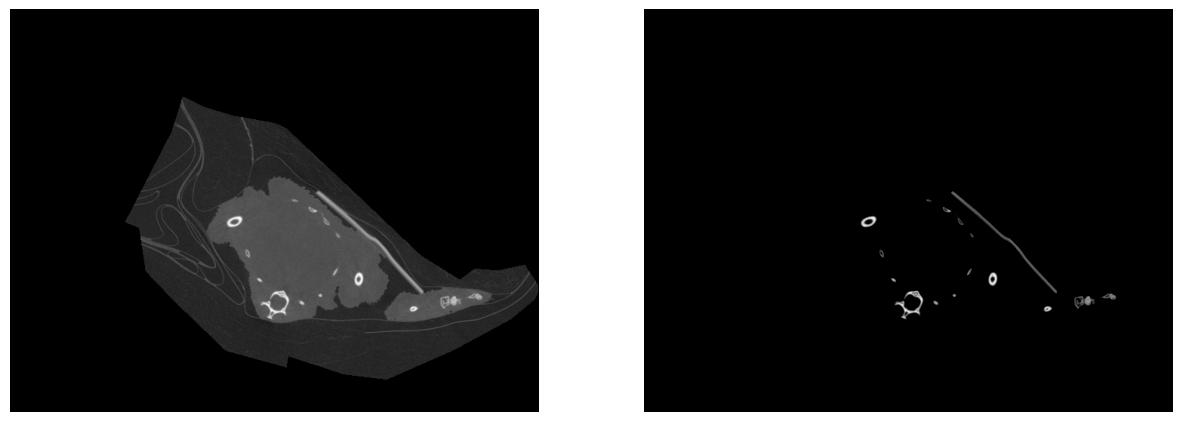

In [12]:
image_sequence = iio.imread(r'C:\Users\pgmw9\Downloads\morphosource_media-10-items_download-9e5991ae\Media 000168325 - Element Unspecified CTImageSeries CT\KU-herp-75787-wholebody-000168325\KU-herp-75787-wholebody\KU-herp-75787-wholebody0000.tif', format="TIFF")
print(image_sequence.shape)

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
# Draw the image in grayscale
ax[0].imshow(im, cmap='gray')

# Draw the image with greater contrast
ax[1].imshow(im, cmap='gray', vmin=23000, vmax=62000)

# Remove axis ticks and labels
ax[0].axis('off')
ax[1].axis('off')

In [41]:
folder_path = 'C:/Users/pgmw9/Downloads/morphosource_media-10-items_download-9e5991ae/Media 000168325 - Element Unspecified CTImageSeries CT/KU-herp-75787-wholebody-000168325/KU-herp-75787-wholebody/'
tiflist = sorted([os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.tif')])
print(tiflist)

['C:/Users/pgmw9/Downloads/morphosource_media-10-items_download-9e5991ae/Media 000168325 - Element Unspecified CTImageSeries CT/KU-herp-75787-wholebody-000168325/KU-herp-75787-wholebody/KU-herp-75787-wholebody0000.tif', 'C:/Users/pgmw9/Downloads/morphosource_media-10-items_download-9e5991ae/Media 000168325 - Element Unspecified CTImageSeries CT/KU-herp-75787-wholebody-000168325/KU-herp-75787-wholebody/KU-herp-75787-wholebody0001.tif', 'C:/Users/pgmw9/Downloads/morphosource_media-10-items_download-9e5991ae/Media 000168325 - Element Unspecified CTImageSeries CT/KU-herp-75787-wholebody-000168325/KU-herp-75787-wholebody/KU-herp-75787-wholebody0002.tif', 'C:/Users/pgmw9/Downloads/morphosource_media-10-items_download-9e5991ae/Media 000168325 - Element Unspecified CTImageSeries CT/KU-herp-75787-wholebody-000168325/KU-herp-75787-wholebody/KU-herp-75787-wholebody0003.tif', 'C:/Users/pgmw9/Downloads/morphosource_media-10-items_download-9e5991ae/Media 000168325 - Element Unspecified CTImageSeries

Create Volume from list of tiff files

In [43]:
vol = np.stack([iio.imread(tif) for tif in tiflist], 0)

c:\Users\pgmw9\Documents\Georgia Tech\HAAG\Lizard-Auto-Segmentation\venv\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  """Entry point for launching an IPython kernel.


In [44]:
vol.shape

(1616, 534, 701)

(-0.5, 700.5, 533.5, -0.5)

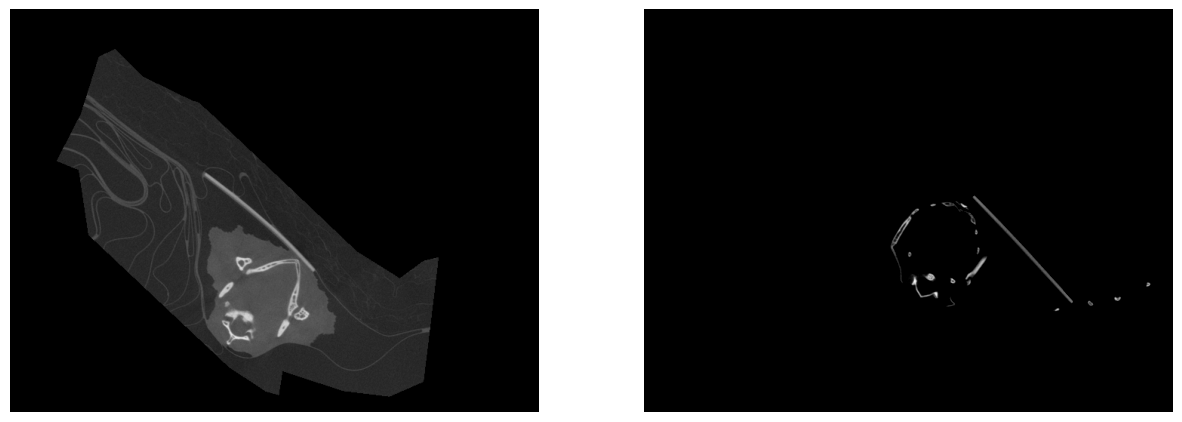

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
# Draw the image in grayscale
ax[0].imshow(vol[700, :, :], cmap='gray', vmin=0, vmax=62000)

# Draw the image with greater contrast
ax[1].imshow(vol[1200, :, :], cmap='gray', vmin=23000, vmax=62000)

# Remove axis ticks and labels
ax[0].axis('off')
ax[1].axis('off')